# Data & Things

## Lecture : IoT and Data

# Simulate sensor data & apply PCA

In this exercise, you will do the following:
1. Simulate sensor data
2. Apply PCA to simulated data
3. Simulate a new point
4. Find out which region the new point belongs to

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

in general pricipal componenet analysis (PCA) is a way to reduce dimensions of a dataset by  



In [4]:
# Step 1 Simulate synthetic predictive maintenance dataset
#create random seed which is used below to generate the sensor data
np.random.seed(42)
time_steps = 10000

sensors = {}
for i in range(1, 21):
    sensors[f'Sensor{i}'] = np.linspace(50, 100, time_steps) + np.random.normal(0, 20, time_steps)

# Combine into a DataFrame
data = pd.DataFrame(sensors)

print("Sample Data:")
print(data.head())

Sample Data:
     Sensor1    Sensor2    Sensor3    Sensor4    Sensor5    Sensor6  \
0  59.934283  36.430105  56.965725  10.388561  40.562849  51.964123   
1  47.239714  43.895011  55.671472  28.905288  70.259050  48.722836   
2  62.963772  38.062380  31.279604  38.269433  46.046264  69.045816   
3  80.475599  52.223362  61.606686  53.008380  51.826387  80.671624   
4  45.336935  73.963573  20.218348  70.503249  64.367814  63.756941   

     Sensor7    Sensor8    Sensor9   Sensor10   Sensor11   Sensor12  \
0  51.576755  56.403048  63.280022  69.217891  70.611892  66.017477   
1  61.262950  72.314233  44.082680  42.605706  26.897905  49.021813   
2  56.832040  19.905237  48.678273  38.418383  61.518745  41.079748   
3  24.456718  84.807115  46.507354  68.681245  37.630232  53.375301   
4  46.295596  56.621738  60.301076  -4.610793  43.471946   7.484493   

    Sensor13   Sensor14   Sensor15   Sensor16   Sensor17   Sensor18  \
0  45.626995  72.350652  44.689254  77.397560  78.652455  13.5

In [5]:
# Step 2: Standardize the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
print("Scaled Data Sample:")
print(pd.DataFrame(scaled_data, columns=data.columns).head())

Scaled Data Sample:
    Sensor1   Sensor2   Sensor3   Sensor4   Sensor5   Sensor6   Sensor7  \
0 -0.610580 -1.566006 -0.725010 -2.596654 -1.407431 -0.927666 -0.969437   
1 -1.126525 -1.265030 -0.777771 -1.850742 -0.198347 -1.057996 -0.572396   
2 -0.487452 -1.500195 -1.772111 -1.473524 -1.184173 -0.240819 -0.754021   
3  0.224281 -0.929241 -0.535820 -0.879792 -0.948835  0.226649 -2.081098   
4 -1.203859 -0.052701 -2.223025 -0.175043 -0.438209 -0.453482 -1.185914   

    Sensor8   Sensor9  Sensor10  Sensor11  Sensor12  Sensor13  Sensor14  \
0 -0.746813 -0.479506 -0.232249 -0.186682 -0.367113 -1.184181 -0.110562   
1 -0.106939 -1.258090 -1.320570 -1.955170 -1.054209 -0.697301 -0.772550   
2 -2.214587 -1.071707 -1.491814 -0.554553 -1.375289 -0.412171 -0.701019   
3  0.395468 -1.159753 -0.254195 -1.520984 -0.878208 -1.964016 -1.982653   
4 -0.738018 -0.600323 -3.251518 -1.284652 -2.733470 -0.924990 -0.686938   

   Sensor15  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  
0 -1.220616  0

In [6]:
# Using pricipal component analysis we split the dataset into five new columns 
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# the results are stored as a dataframe and each column is given a name from PC1 - PC5
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-3.697276,0.807661,0.827017,1.785296,-0.265841
1,-4.330366,0.303912,-0.256562,-0.264370,-1.273695
2,-4.869362,-0.678489,0.499375,0.677106,0.598557
3,-3.728347,0.066625,0.505255,0.944187,0.119946
4,-5.039456,-0.849799,-2.145603,-0.287005,0.598844
...,...,...,...,...,...
9995,5.057292,1.323372,-1.232449,0.109919,0.330081
9996,5.339193,-0.183616,-0.683768,-0.936819,0.348873
9997,3.741985,-0.655410,-0.832213,-0.215451,-0.084327
9998,4.459259,0.923429,0.036107,-1.146528,-0.542133


In [7]:
# after the dimension reduction we can see how much variance each of the new columns contain
pca.explained_variance_ratio_

array([0.37687365, 0.0359165 , 0.03507436, 0.03489235, 0.03428399])

<BarContainer object of 5 artists>

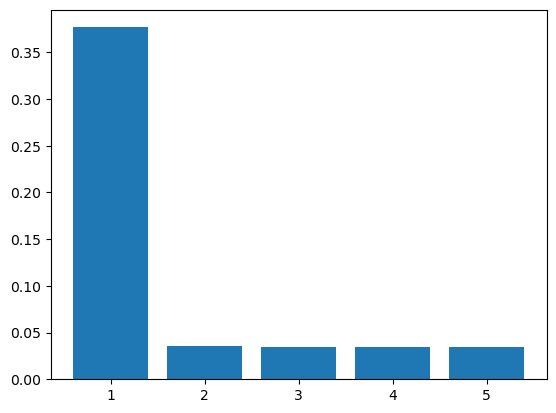

In [8]:
# recall the lines that we draw to visualize the dimensional reduction the first line would naturally capture most of the variance of the data
# we see the same here as PC1 contains a large amount of variance, compared to the other dimensions 
plt.bar(range(1,6),pca.explained_variance_ratio_)

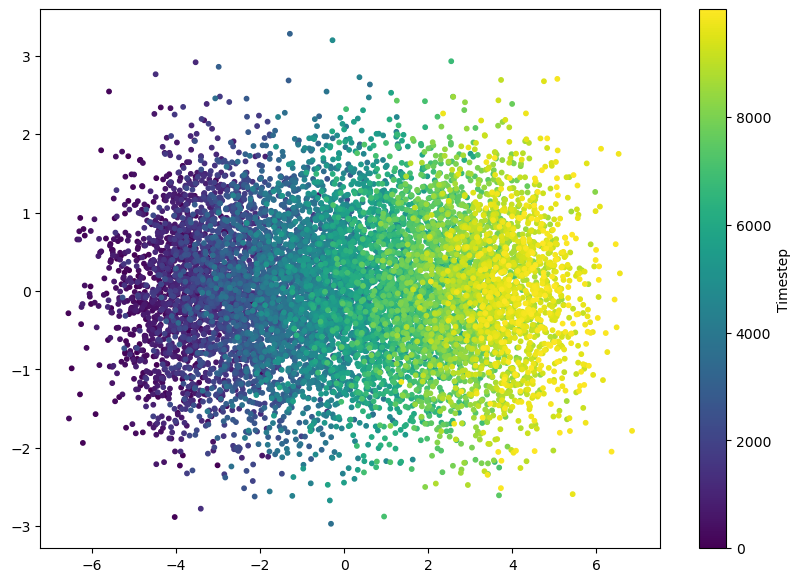

In [9]:
# Step 3: We visualize the components of PC1 and PC2 giving us a 2-dimensional plot of the data
# This sort of visualization of the data can be very helpful to make general rules for maintenance, were some hardware with a temprature sensor
# can be used to find out when it is about to overheat based on the sensor (predictive maintenance)
plt.figure(figsize=(10,7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=range(len(pca_df)), s=10)
plt.colorbar(label= "Timestep")

In [24]:
# Step 4: Simulate a new observation and predict its position
new_observation = np.array([[75] * 20])
scaled_new_observation = scaler.transform(new_observation)
new_pca = pca.transform(scaled_new_observation)

print("New observation PCA position:", new_pca)

New observation PCA position: [[-0.00353968  0.01164137 -0.00388459  0.0007376   0.00233923]]


C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
new_pca = pd.DataFrame(new_pca)



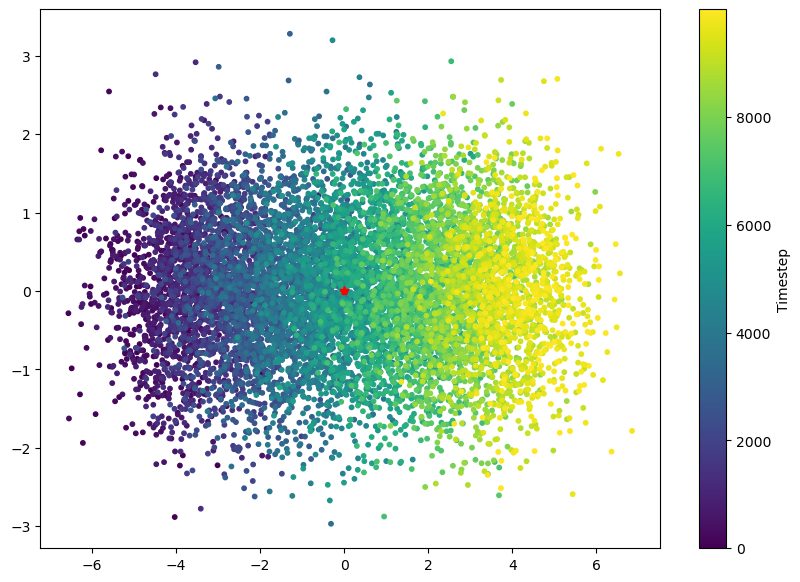

In [50]:
# Step 5: We use plt.plot to plot the point into the existing scatter plot, 
# using a marker and the color red to differentiate it from the rest of the points
plt.figure(figsize=(10,7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=range(len(pca_df)), s=10)
plt.plot(new_pca, marker="*", c='red')
plt.colorbar(label= "Timestep")
plt.show()

Do the following tasks:
1. Apply PCA with upto 5 components
2. Visualize how much variance of the dataset is defined by each component
3. Visualize the first 2 principal components and color them by timestep
4. Simulate a new position using code below
5. Plot the new point in the original 2D PCA graph